**Baysian Method of A/B Testing**

An exercise from a class on Bayesian Machine Learning

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [16]:
NUM_TRIALS = 2000
Bandit_probabilities = [0.2, 0.5, 0.75]

In [17]:

%matplotlib inline

current samples: ['0.1396', '0.1230', '0.0067']


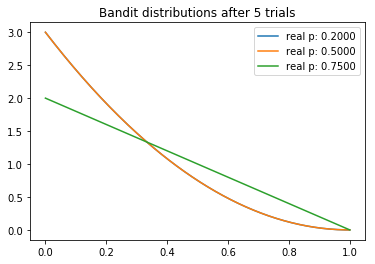

current samples: ['0.2527', '0.2995', '0.5560']


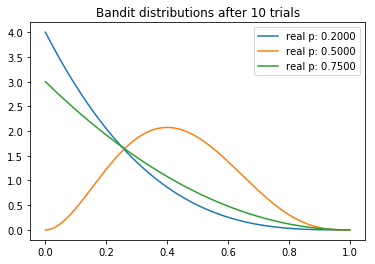

current samples: ['0.1430', '0.4378', '0.6158']


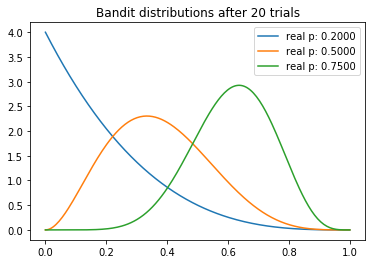

current samples: ['0.1763', '0.7376', '0.6315']


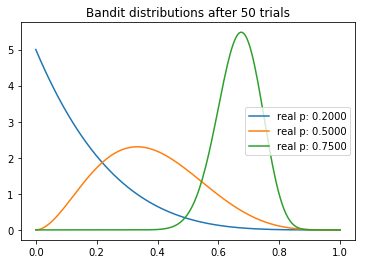

current samples: ['0.0304', '0.3591', '0.7099']


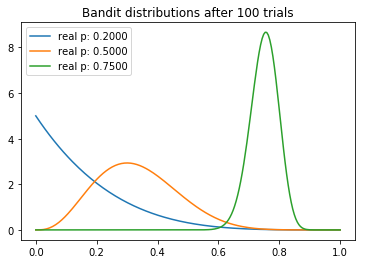

current samples: ['0.4210', '0.4355', '0.7842']


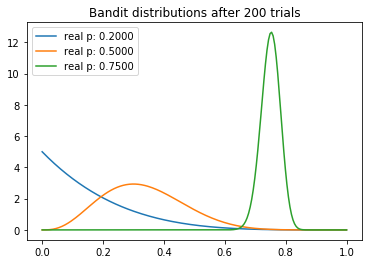

current samples: ['0.0709', '0.1363', '0.7518']


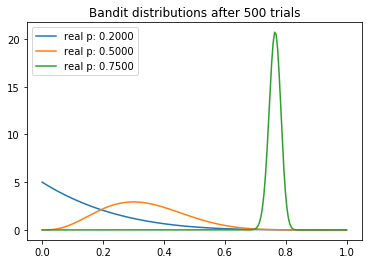

current samples: ['0.0825', '0.3090', '0.7269']


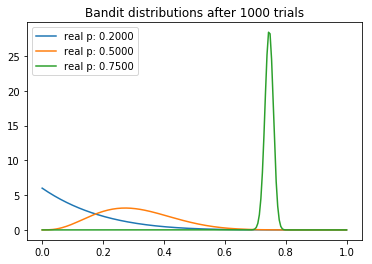

current samples: ['0.2477', '0.2183', '0.7614']


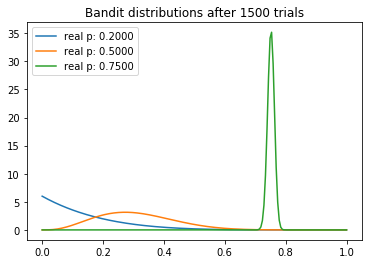

current samples: ['0.2709', '0.3100', '0.7412']


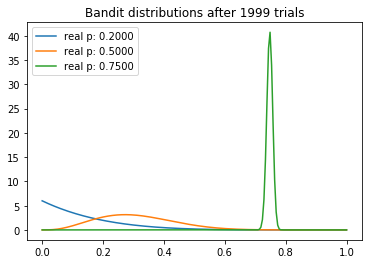

In [64]:
NUM_TRIALS = 2000
Bandit_probabilities = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a, self.b)
    
    def update(self, x):
        self.a += x
        self.b += 1 - x
        
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label = "real p: %.4f" % b.p)
    plt.title("Bandit distributions after %s trials" % trial)
    plt.legend()
    plt.show()
        
    
def experiment():
    bandits = [Bandit(p) for p in Bandit_probabilities]
    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999, 2000]
    for i in range(NUM_TRIALS):
        bestb = None
        maxsample = -1
        allsamples = []
        for b in bandits:
            sample = b.sample()
            allsamples.append("%.4f" % sample)
            if sample > maxsample:
                maxsample = sample
                bestb = b
        if i in sample_points:
            print("current samples: %s" % allsamples)
            plot(bandits, i)
                    
        x = bestb.pull()
        bestb.update(x)
                
if __name__ == '__main__':
    experiment()

As tests increase, it becomes apparent that the green bandit is giving the most successful results, and it is now statistically supported to continually choose the green bandit, as it has the most likely payoff.